In [52]:
import fitsio
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
from astropy.table import Table,vstack,join,unique

test

In [58]:
from desitarget.targetmask import zwarn_mask

In [18]:
sys.path.append('/global/u2/a/ajross/LSS/py')

In [42]:
prog = 'dark'

In [36]:
mt.dtype.names

('TILEID',
 'SURVEY',
 'FAPRGRM',
 'FAFLAVOR',
 'NEXP',
 'EXPTIME',
 'TILERA',
 'TILEDEC',
 'EFFTIME_ETC',
 'EFFTIME_SPEC',
 'EFFTIME_GFA',
 'GOALTIME',
 'OBSSTATUS',
 'ZDONE',
 'LRG_EFFTIME_DARK',
 'ELG_EFFTIME_DARK',
 'BGS_EFFTIME_BRIGHT',
 'LYA_EFFTIME_DARK',
 'GOALTYPE',
 'MINTFRAC',
 'LASTNIGHT',
 'QA',
 'USER',
 'OVERRIDE',
 'QANIGHT',
 'ARCHIVEDATE')

In [43]:
mt = Table.read('/global/cfs/cdirs/desi/survey/ops/surveyops/trunk/ops/tiles-specstatus.ecsv')
wd = mt['SURVEY'] == 'main'
#wd &= mt['ZDONE'] == 'true'
wd &= mt['OBSSTATUS'] == 'obsend'
wd &= mt['FAPRGRM'] == prog
mtd = mt[wd]

tiles4comb = Table()
tiles4comb['TILEID'] = mtd['TILEID']
#tiles4comb['ZDATE'] = mtd['LASTNIGHT']
tiles4comb['ZDATE'] = mtd['ARCHIVEDATE']
tiles4comb['THRUDATE'] = mtd['LASTNIGHT']

In [44]:
tdates = [20211211,20211215]
sel = np.isin(tiles4comb['THRUDATE'],tdates)
print(len(tiles4comb[sel]))

29


In [53]:
tiles = tiles4comb[sel]
s = 0
n = 0
nfail = 0

for tile,tdate in zip(tiles['TILEID'],tiles['THRUDATE']):
    tdate = str(tdate)
    tspec = combspecdata_simp(tile,tdate)
    if tspec:
        tspec['TILEID'] = tile
        if s == 0:
            specd = tspec
            s = 1
        else:
            specd = vstack([specd,tspec],metadata_conflicts='silent')
        specd.sort('TARGETID')
        kp = (specd['TARGETID'] > 0)
        specd = specd[kp]

        n += 1
        print(tile,n,len(tiles),len(specd)) 
    else:
            print(str(tile)+' failed')
            nfail += 1  
specdfid = np.copy(specd)

spectrographs with data on tile 1262:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
1262 1 29 4282
spectrographs with data on tile 2431:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
2431 2 29 8563
spectrographs with data on tile 2443:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
2443 3 29 12844
spectrographs with data on tile 2445:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
2445 4 29 17125
spectrographs with data on tile 2519:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
2519 5 29 21406
spectrographs with data on tile 2542:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
2542 6 29 25687
spectrographs with data on tile 4137:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
4137 7 29 29968
spectrographs with data on tile 4450:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
4450 8 29 34249
spectrographs with data on tile 5606:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
5606 9 29 38530
spectrographs with data on tile 7009:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
7009 10 29 42810
spectrographs with data on tile 7210:
[0, 1, 2, 3, 

test

In [50]:
def combspecdata_simp(tile,tdate,coaddir='/global/cfs/cdirs/desi/spectro/redux/daily/tiles/cumulative/',md='' ):
    #put data from different spectrographs together, one table for fibermap, other for z
    tdate = str(tdate)
    specs = []
    #find out which spectrograph have data
    zfn = 'zbest'
    zhdu = 'ZBEST'
    shdu = 'SCORES'
    if int(tdate) >  20210730:
        zfn = 'redrock'
        zhdu = 'REDSHIFTS'
        #shdu = 'TSNR2' 
        

    for si in range(0,10):
        ff = coaddir+str(tile)+'/'+tdate+'/'+zfn+'-'+str(si)+'-'+str(tile)+'-thru'+tdate+'.fits'
        if os.path.isfile(ff):
            fq = coaddir+str(tile)+'/'+tdate+'/zmtl-'+str(si)+'-'+str(tile)+'-thru'+tdate+'.fits'
            if os.path.isfile(fq):

                specs.append(si)
            else:
                print('did not find '+fq)    
        elif zfn == 'zbest':
            zfnt = 'redrock'
            ff = coaddir+str(tile)+'/'+tdate+'/'+zfnt+'-'+str(si)+'-'+str(tile)+'-thru'+tdate+'.fits'
            if os.path.isfile(ff):
                fq = coaddir+str(tile)+'/'+tdate+'/zmtl-'+str(si)+'-'+str(tile)+'-thru'+tdate+'.fits'
                zfn = zfnt
                zhdu = 'REDSHIFTS'
                if os.path.isfile(fq):

                    specs.append(si)
                else:
                    print('did not find '+fq)    
            else:
                print('did not find '+ff)            
        else:
            print('did not find '+ff)        
    print('spectrographs with data on tile '+str(tile)+':')
    print(specs)            
    if len(specs) == 0:
        return None
    for i in range(0,len(specs)):
        tn = Table.read(coaddir+str(tile)+'/'+tdate+'/'+zfn+'-'+str(specs[i])+'-'+str(tile)+'-thru'+tdate+'.fits',hdu=zhdu)
        tnq = Table.read(coaddir+str(tile)+'/'+tdate+'/zmtl-'+str(specs[i])+'-'+str(tile)+'-thru'+tdate+'.fits')
        tnf = Table.read(coaddir+str(tile)+'/'+tdate+'/'+zfn+'-'+str(specs[i])+'-'+str(tile)+'-thru'+tdate+'.fits',hdu='FIBERMAP')
        tns = Table.read(coaddir+str(tile)+'/'+tdate+'/coadd-'+str(specs[i])+'-'+str(tile)+'-thru'+tdate+'.fits',hdu=shdu)
    
        if i == 0:
           tspec = tn
           tq = tnq
           tf = tnf
           ts = tns
        else:    
            ts = vstack([ts,tns],metadata_conflicts='silent')
            tq = vstack([tq,tnq],metadata_conflicts='silent')
            tspec = vstack([tspec,tn],metadata_conflicts='silent')
            tf = vstack([tf,tnf],metadata_conflicts='silent')
        
    
    tf = unique(tf,keys=['TARGETID'])
    tq.keep_columns(['TARGETID','Z_QN','Z_QN_CONF','IS_QSO_QN','ZWARN'])
    tq['ZWARN'].name = 'ZWARN_MTL'
    tspec = join(tspec,tf,keys=['TARGETID'],join_type='left',metadata_conflicts='silent')
    tspec = join(tspec,ts,keys=['TARGETID'],join_type='left',metadata_conflicts='silent')
    tspec = join(tspec,tq,keys=['TARGETID'],join_type='left',metadata_conflicts='silent')

    print(len(tspec),len(tf))
    #tspec['LOCATION'] = tf['LOCATION']
    #tspec['FIBERSTATUS'] = tf['FIBERSTATUS']
    #tspec['PRIORITY'] = tf['PRIORITY']
    return tspec


In [54]:
print(len(specdfid))

124150


In [57]:
s =0
n = 0
nfail = 0
for tile,tdate in zip(tiles['TILEID'],tiles['THRUDATE']):
    tdate = str(tdate)
    tspec = combspecdata_simp(tile,tdate,'/global/cfs/cdirs/desi/users/sjbailey/spectro/redux/ampbkg/tiles/cumulative/')
    if tspec:
        tspec['TILEID'] = tile
        if s == 0:
            specd = tspec
            s = 1
        else:
            specd = vstack([specd,tspec],metadata_conflicts='silent')
        specd.sort('TARGETID')
        kp = (specd['TARGETID'] > 0)
        specd = specd[kp]

        n += 1
        print(tile,n,len(tiles),len(specd)) 
    else:
            print(str(tile)+' failed')
            nfail += 1  
specdnew = np.copy(specd)

spectrographs with data on tile 1262:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
1262 1 29 4282
spectrographs with data on tile 2431:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
2431 2 29 8563
spectrographs with data on tile 2443:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
2443 3 29 12844
spectrographs with data on tile 2445:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
2445 4 29 17125
spectrographs with data on tile 2519:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
2519 5 29 21406
spectrographs with data on tile 2542:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
2542 6 29 25687
spectrographs with data on tile 4137:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
4137 7 29 29968
spectrographs with data on tile 4450:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
4450 8 29 34249
spectrographs with data on tile 5606:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
5606 9 29 38530
spectrographs with data on tile 7009:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
5000 5000
7009 10 29 42810
spectrographs with data on tile 7210:
[0, 1, 2, 3, 

In [113]:
def get_goodLRG(dat):            
    nodata = dat["ZWARN_MTL"] & zwarn_mask["NODATA"] != 0
    num_nod = np.sum(nodata)
    print('number with no data '+str(num_nod))
    badqa = dat["ZWARN_MTL"] & zwarn_mask.mask("BAD_SPECQA|BAD_PETALQA") != 0
    num_badqa = np.sum(badqa)
    print('number with bad qa '+str(num_badqa))
    nomtl = nodata | badqa
    wfqa = ~nomtl
    #wfqa &= dat['TSNR2_LRG'] > 50
    wlrg = (dat['DESI_TARGET'] & 1) > 0
    zlrg = dat[wfqa&wlrg]
    return zlrg


In [114]:
lrgfid = get_goodLRG(specdfid)

number with no data 2844
number with bad qa 1049


In [115]:
len(lrgfid)

33138

In [116]:
lrgnew = get_goodLRG(specdnew)

number with no data 2920
number with bad qa 1088


In [117]:
len(lrgnew)

33116

In [118]:
selnew = np.isin(lrgnew['TARGETID'],lrgfid['TARGETID'])
lrgnewf = lrgnew[selnew]
print(len(lrgnewf))
                                           

33116


In [119]:
selfid = np.isin(lrgfid['TARGETID'],lrgnew['TARGETID'])
lrgfidn = lrgfid[selfid]
print(len(lrgfidn))


33116


(array([3.0000e+00, 1.0000e+01, 1.0900e+02, 3.7800e+02, 4.1180e+03,
        1.6598e+04, 8.3450e+03, 7.7900e+02, 1.1500e+02, 1.7000e+01]),
 array([-4.33772749, -2.598749  , -0.8597705 ,  0.879208  ,  2.61818649,
         4.35716499,  6.09614349,  7.83512198,  9.57410048, 11.31307898,
        13.05205747]),
 <a list of 1 Patch objects>)

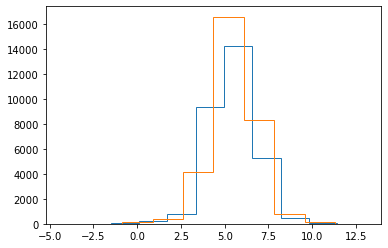

In [93]:
plt.hist(np.log(lrgfidn['DELTACHI2']),histtype='step')
plt.hist(np.log(lrgnewf['DELTACHI2']),histtype='step')

In [77]:
def glrg(dat):
    drz = (10**(3 - 3.5*dat['Z']))
    mask_bad = (drz>30) & (dat['DELTACHI2']<30)
    mask_bad |= (drz<30) & (dat['DELTACHI2']<drz)
    mask_bad |= (dat['DELTACHI2']<10)
    wz = dat['ZWARN'] == 0
    wz &= dat['Z']<1.4
    wz &= (~mask_bad)

    wzwarn = wz#zmtlf['ZWARN'] == 0
    gzlrg = dat[wzwarn]
    return gzlrg


In [121]:
sel = lrgnewf['COADD_NUMEXP'] == lrgfidn['COADD_NUMEXP']
print(len(lrgnewf[sel]))

In [121]:
gnew = glrg(lrgnewf[sel])

In [122]:
len(gnew)

28647

In [123]:
gfid = glrg(lrgfidn[sel])

In [124]:
len(gfid)

28585

In [126]:
len(gfid)/len(lrgfidn[sel])

0.9734377660480164

In [127]:
len(gnew)/len(lrgnewf[sel])

0.9755491231057382

In [128]:
lrgfidn = lrgfidn[sel]
lrgnewf = lrgnewf[sel]

In [130]:
for pt in range(0,10):
    print(pt)
    sgn = gnew['PETAL_LOC'] == pt
    san = lrgnewf['PETAL_LOC'] == pt
    print('new success is '+str(len(gnew[sgn])/len(lrgnewf[san])))
    sgf = gfid['PETAL_LOC'] == pt
    saf = lrgfidn['PETAL_LOC'] == pt
    print('old success is '+str(len(gfid[sgf])/len(lrgfidn[san])))
    
          
    
    

0
new success is 0.9692954104718811
old success is 0.9702650290885585
1
new success is 0.9702752293577982
old success is 0.9724770642201835
2
new success is 0.9798260869565217
old success is 0.9808695652173913
3
new success is 0.9773413897280967
old success is 0.976963746223565
4
new success is 0.9773625583902263
old success is 0.9547251167804528
5
new success is 0.9798897178073305
old success is 0.9776192020759001
6
new success is 0.9845360824742269
old success is 0.9838917525773195
7
new success is 0.9683225341972642
old success is 0.9694024478041756
8
new success is 0.9775136524253132
old success is 0.9768711853517508
9
new success is 0.9705882352941176
old success is 0.969955724225174


In [103]:
print(np.unique(lrgfidn['COADD_NUMEXP'],return_counts=True))
print(np.unique(lrgnewf['COADD_NUMEXP'],return_counts=True))

(array([1, 2, 3], dtype=int16), array([19458,  8933,  2081]))
(array([1, 2, 3], dtype=int16), array([20699,  7692,  2081]))


In [100]:
specdfid.dtype.names

('TARGETID',
 'CHI2',
 'COEFF',
 'Z',
 'ZERR',
 'ZWARN',
 'NPIXELS',
 'SPECTYPE',
 'SUBTYPE',
 'NCOEFF',
 'DELTACHI2',
 'PETAL_LOC',
 'DEVICE_LOC',
 'LOCATION',
 'FIBER',
 'COADD_FIBERSTATUS',
 'TARGET_RA',
 'TARGET_DEC',
 'PMRA',
 'PMDEC',
 'REF_EPOCH',
 'LAMBDA_REF',
 'FA_TARGET',
 'FA_TYPE',
 'OBJTYPE',
 'FIBERASSIGN_X',
 'FIBERASSIGN_Y',
 'PRIORITY',
 'SUBPRIORITY',
 'OBSCONDITIONS',
 'RELEASE',
 'BRICKNAME',
 'BRICKID',
 'BRICK_OBJID',
 'MORPHTYPE',
 'EBV',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'MASKBITS',
 'SERSIC',
 'SHAPE_R',
 'SHAPE_E1',
 'SHAPE_E2',
 'REF_ID',
 'REF_CAT',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'PARALLAX',
 'PHOTSYS',
 'PRIORITY_INIT',
 'NUMOBS_INIT',
 'DESI_TARGET',
 'BGS_TARGET',
 'MWS_TARGET',
 'SCND_TARGET',
 'PLAT

In [106]:
lrgfidn.sort('TARGETID')

TypeError: an integer is required (got type str)

In [110]:
lrgnewf['TARGETID'][0]

39627328875138396

In [111]:
np.array_equal(lrgnewf['TARGETID'],lrgfidn['TARGETID'])

True

29365
